Tutorial 1: Grids
=================

In this example, we'll create _Grid_'s of Cartesian (y,x) coordinates, representing the arc-second coordinate _Grid_ 
of an observed data-set (e.g. imaging).

In [1]:
%matplotlib inline

import autolens as al
import autolens.plot as aplt

In PyAutoLens, a _Grid_ is a set of two-dimensional (y,x) coordinates (in arc-seconds) that are deflected and traced by 
a strong lensing system. The (0,0) pixel is the upper left pixel.

This coordinate _Grid_ is aligned with the image we analyze, such that each coordinate on a  _Grid_ maps to the centre 
of each image-pixel. Lets make a _Grid_ using 100 x 100 pixels, with a pixel scale (arcsecond-to-pixel conversion 
factor) of 0.05", giving us a a 5" x 5" grid.

In [34]:
grid = al.Grid.uniform(shape_2d=(100, 100), pixel_scales=0.05)

First, lets plot this _Grid_, which shows that it is a fairly bland uniform _Grid_ of dots.

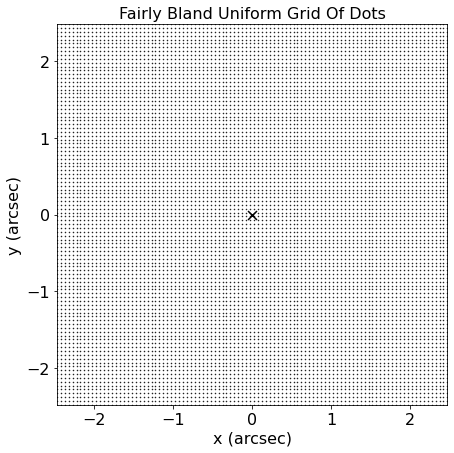

In [35]:
plotter = aplt.Plotter(labels=aplt.Labels(title="Fairly Bland Uniform Grid Of Dots"))

aplt.Grid(grid=grid, plotter=plotter, include=aplt.Include(origin=True))

We can print each coordinate of this _Grid_, revealing that it consists of a set of arc-second coordinates (where the 
spacing between each coordinate corresponds to the 'pixel_scales' of 0.05" defined above)

In [7]:
print("(y,x) pixel 0:")
print(grid.in_2d[0, 0])
print("(y,x) pixel 1:")
print(grid.in_2d[0, 1])
print("(y,x) pixel 2:")
print(grid.in_2d[0, 2])
print("(y,x) pixel 100:")
print(grid.in_2d[0, 99])
print("etc.")

(y,x) pixel 0:
[ 2.475 -2.475]
(y,x) pixel 1:
[ 2.475 -2.425]
(y,x) pixel 2:
[ 2.475 -2.375]
(y,x) pixel 100:
[2.475 2.475]
etc.


_Grid_'s in PyAutoLens are stored as both 1D and 2D NumPy arrays, because different calculations benefit from us using 
the array in different formats. We can access both the 1D and 2D _Array_'s automatically by specifying the input as a 1D 
or 2D.

In [8]:
print("(y,x) pixel 0 (accessed in 2D):")
print(grid.in_2d[0, 0])
print("(y,x) pixel 0 (accessed in 1D):")
print(grid.in_1d[0])

(y,x) pixel 0 (accessed in 2D):
[ 2.475 -2.475]
(y,x) pixel 0 (accessed in 1D):
[ 2.475 -2.475]


The shape of the _Grid_ is also available in 1D and 2D, consisting of 10000 (100 x 100) coordinates.

In [13]:
print(grid.shape_2d)
print(grid.shape_1d)

(100, 100)
10000


A _Grid_ can also have a sub-grid, which splits each pixel on the _Grid_ into sub-pixels of size (sub_size x sub_size). 
These additional pixels are used to perform calculations more accurately.

In [20]:
grid = al.Grid.uniform(shape_2d=(100, 100), pixel_scales=0.05, sub_size=2)

We specified a sub_size of 2 above, therefore we expect 4 (2 x 2) times more sub-pixels than pixels. We can see this 
is the case by inspecting the _Grid_ sub_shape attributes.

In [21]:
print(len(grid))

40000


In [22]:
print(grid.sub_shape_1d)
print(grid.sub_shape_2d)

40000
(200, 200)


pixel 1

              _________
              
              I         I
              
              I         I  o = (y,x) centre of
              
 y = 2.475"   I    o    I       _Grid_ coordinate.
 
              I         I
              
              I_________I
              
              x = -2.475


Sub-pixels 1, 2, 3 & 4

               _________
               
              I         I
              
              I  o   o  I  o = (y,x) centre of sub
              
 y = 2.475"   I         I       _Grid_ coordinates.
 
              I  o   o  I
              
              I_________I
              
              x = -2.475

The sub-pixels coordinate are spaced uniformly between the pixel's edges
(which are at y = (2.45", 2.5") and x = (-2.5". -2.45") )

By default, a _Grid_ is stored in 1D, and we can access its elements without specifying 'in_1d'

In [25]:
print("(y,x) sub-pixel 0 (of pixel 0):")
print(grid[0])
print("(y,x) sub-pixel 1 (of pixel 0):")
print(grid[1])
print("(y,x) sub-pixel 2 (of pixel 0):")
print(grid[2])
print("(y,x) sub-pixel 3 (of pixel 0):")
print(grid[3])

(y,x) sub-pixel 0 (of pixel 0):
[ 2.4875 -2.4875]
(y,x) sub-pixel 1 (of pixel 0):
[ 2.4875 -2.4625]
(y,x) sub-pixel 2 (of pixel 0):
[ 2.4625 -2.4875]
(y,x) sub-pixel 3 (of pixel 0):
[ 2.4625 -2.4625]


The sub-grid then continues on to the next _Grid_ pixels (and so on)

In [26]:
print("(y,x) sub-pixel 0 (of pixel 1):")
print(grid[4])
print("(y,x) sub-pixel 0 (of pixel 1):")
print(grid[5])
print("etc.")

(y,x) sub-pixel 0 (of pixel 1):
[ 2.4875 -2.4375]
(y,x) sub-pixel 0 (of pixel 1):
[ 2.4875 -2.4125]
etc.


We can again access these coordinates in 2D.

In [27]:
print("(y,x) sub-pixel 0 (of pixel 1):")
print(grid.in_2d[0, 2])
print("(y,x) sub-pixel 1 (of pixel 1):")
print(grid.in_2d[0, 3])
print("etc.")

(y,x) sub-pixel 0 (of pixel 1):
[ 2.4875 -2.4375]
(y,x) sub-pixel 1 (of pixel 1):
[ 2.4875 -2.4125]
etc.


Congratulations, you've completed your first PyAutoLens tutorial!